In [1]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install surprise


     |████████████████████████████████| 11.8MB 5.9MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1618295 sha256=9f436a6ab3cbc649592c80c455584081494f940cb7cd1b113c378a4530fca29c
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [5]:
pip install recmetrics

In [8]:
pip install funcsigs

In [45]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from surprise import KNNWithMeans
from surprise import accuracy
from surprise import SVD
from funcsigs import signature
import recmetrics
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split


ImportError: ignored

In [36]:
import recmetrics

ImportError: ignored

In [10]:
import os
os.chdir('/content/drive/MyDrive/ColabNotebooks/')

In [11]:
df = pd.read_csv('Electronic_dataset.csv')

In [12]:
df.head(5)

,user_id,prod_id,ratings,timestamp
0,A3L1GVWVJKWZZS,B0058UUR6E,5.0,1364774400
1,A08831071BVKZMKNCPI5S,B009ID0VVS,5.0,1357257600
2,A1SINU2I4IOPNU,B000GBO9IM,4.0,1358121600
3,A3P3P31EEOX2BD,B00CDCIOHO,3.0,1404950400
4,A3DBLJ3MPBJQMN,B000MS3VGA,5.0,1294444800


1. Read and explore the given dataset. ( Rename column/add headers, plot
histograms, find data characteristics) ( 13 Marks)

In [13]:
df.shape

(500000, 4)

In [14]:
df['user_id'].nunique()

448368

In [15]:
df['prod_id'].nunique()

130138

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    500000 non-null  object 
 1   prod_id    500000 non-null  object 
 2   ratings    500000 non-null  float64
 3   timestamp  500000 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 15.3+ MB


In [17]:
df.drop_duplicates(keep='first',inplace=True)

In [18]:
df.shape

(500000, 4)

In [19]:
#dropping timestamp column - it's of no significance 
df = df.drop(labels = "timestamp", axis = 1)

In [20]:
df.shape

(500000, 3)

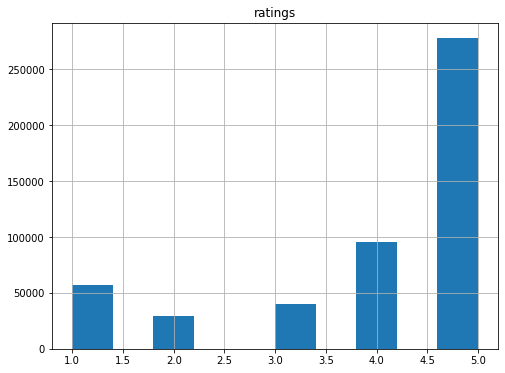

In [21]:
df.hist(figsize=(8,6), xlabelsize = 10);

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ratings,500000.0,4.013172,1.379996,1.0,3.0,5.0,5.0,5.0


2. Build Popularity Recommender model. ( 10 marks)

In [23]:
from collections import Counter
counts = Counter(df.user_id)
df_popular = df[df.user_id.isin([key for key in counts if counts[key] > 10])]
df_popular[df_popular.user_id.isin([key for key in counts if counts[key] > 10])].count()

user_id    1595
prod_id    1595
ratings    1595
dtype: int64

In [24]:
df_popular.shape

(1595, 3)

In [25]:
# These many product must be displayed after groupby
df_popular['prod_id'].nunique()

1479

In [26]:
df_popular['user_id'].nunique()


108

In [27]:
df_popular.head(2)

,user_id,prod_id,ratings
264,A1YEPFLLH42OU1,B00E3W15P0,5.0
413,A10Y058K7B96C6,B005HSG3VK,5.0


In [28]:
#Finding the highest average rated product.
ratings_mean_count = pd.DataFrame(df_popular.groupby('prod_id')['ratings'].mean())

In [29]:
ratings_mean_count['ratings'].sort_values(ascending=False).head(10)

prod_id
B00L2442H0    5.0
B002TMRZOQ    5.0
B0032ANC8M    5.0
B0031AQ302    5.0
B00310V8IY    5.0
B0030MITDK    5.0
B0030H0MSA    5.0
B002YWCO7O    5.0
B002Y1U2M4    5.0
B002XVUTPK    5.0
Name: ratings, dtype: float64

Above products are the most popular products

In [30]:
# Creating a column in the dataframse to records the number of times a product is rated.
ratings_mean_count['rating_counts'] = pd.DataFrame(df_popular.groupby('prod_id')['ratings'].count())

In [31]:
ratings_mean_count.sort_values(by=['ratings','rating_counts'],ascending=False).head(5)

,ratings,rating_counts
prod_id,,
B003ES5ZSW,5.0,3
B007R5YDYA,5.0,3
B00HHRP11C,5.0,3
B000092TS9,5.0,2
B0007VPFI4,5.0,2


Above is the product Ids sorted based on the ratings and times rated.

In [32]:
#Check the shape of new dataframe in which rows must be equal to df_popular['productId'].nunique().
ratings_mean_count.shape

(1479, 2)

3. Split the data randomly into a train and test dataset. ( For example, split it in
70/30 ratio) ( 2 marks)

In [37]:
reader = Reader()
df_UserUser = Dataset.load_from_df(df_popular[['user_id', 'prod_id', 'ratings']], reader)
test_size = 0.30
trainset,testset = train_test_split(df_UserUser,test_size=test_size)

4. Build Collaborative Filtering model. ( 10 marks)

Single Value Decomposition

In [38]:
#train SVD recommender
algo = SVD()
algo.fit(trainset)

#make predictions on test set. 
test = algo.test(testset)
test = pd.DataFrame(test)
test.drop("details", inplace=True, axis=1)
test.columns = ['uid', 'pid', 'r_ui', 'est']
test.head()

,uid,pid,r_ui,est
0,A2QDOJFFLFGF18,B007W7PK04,4.0,4.635273
1,A3LGT6UZL99IW1,B001EYTPO8,2.0,4.438082
2,A1VQHH85U7PX0,B001DL9WDG,5.0,4.290725
3,A2WLNSZ9U0T1S3,B0002A9RFM,5.0,3.908519
4,AVPNQUVZWMDSX,B00008SCFL,4.0,4.249942


In [39]:
#create model (matrix of predicted values)
cf_model = test.pivot_table(index='uid', columns='pid', values='est').fillna(0)


USER- USER

In [40]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

# run the trained model against the testset
test_pred_User = algo.test(testset)
test_pred_User

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


[Prediction(uid='A2QDOJFFLFGF18', iid='B007W7PK04', r_ui=4.0, est=4.28584229390681, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A3LGT6UZL99IW1', iid='B001EYTPO8', r_ui=2.0, est=4.28584229390681, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A1VQHH85U7PX0', iid='B001DL9WDG', r_ui=5.0, est=4.28584229390681, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A2WLNSZ9U0T1S3', iid='B0002A9RFM', r_ui=5.0, est=4.28584229390681, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AVPNQUVZWMDSX', iid='B00008SCFL', r_ui=4.0, est=4.28584229390681, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A20DZX38KRBIT8', iid='B0000AZW8X', r_ui=5.0, est=4.28584229390681, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A1435P5AMCPB3X', ii

In [41]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo_Item = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo_Item.fit(trainset)

# run the trained model against the testset
test_pred_Item = algo_Item.test(testset)
test_pred_Item

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


[Prediction(uid='A2QDOJFFLFGF18', iid='B007W7PK04', r_ui=4.0, est=4.28584229390681, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A3LGT6UZL99IW1', iid='B001EYTPO8', r_ui=2.0, est=4.28584229390681, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A1VQHH85U7PX0', iid='B001DL9WDG', r_ui=5.0, est=4.28584229390681, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A2WLNSZ9U0T1S3', iid='B0002A9RFM', r_ui=5.0, est=4.28584229390681, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AVPNQUVZWMDSX', iid='B00008SCFL', r_ui=4.0, est=4.28584229390681, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A20DZX38KRBIT8', iid='B0000AZW8X', r_ui=5.0, est=4.28584229390681, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A1435P5AMCPB3X', ii

5. Evaluate the above model. ( Once the model is trained on the training data, it
can be used to compute the error (like RMSE) on predictions made on the test
data.) You can also use a different method to evaluate the models. ( 5 marks)


SVD model

In [42]:
# USING SVD
#evaluate model with MSE and RMSE
print ('User-User CF MSE : ',recmetrics.mse(test.r_ui, test.est))
print ('User-User CF RMSE : ',recmetrics.rmse(test.r_ui, test.est))

NameError: ignored


USER-USER

In [ ]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred_User, verbose=True)

User-based Model : Test Set
RMSE: 1.0494


1.0493867254344016


ITEM-ITEM

In [ ]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred_Item, verbose=True)

Item-based Model : Test Set
RMSE: 1.0600


1.0599939748452543

6. Get top - K ( K = 5) recommendations. Since our goal is to recommend new
products to each user based on his/her habits, we will recommend 5 new
products. ( 10 marks)


SVD Recommendations

In [ ]:
def get_users_predictions(user_id, n, model):
    recommended_items = pd.DataFrame(model.loc[user_id])
    recommended_items.columns = ["predicted_rating"]
    recommended_items = recommended_items.sort_values('predicted_rating', ascending=False)    
    recommended_items = recommended_items.head(n)
    return recommended_items.index.tolist()

In [ ]:
#get example prediction
get_users_predictions('A6FIAB28IS79', 5, cf_model)

['B0043TB7OC', 'B000075UZ7', 'B00007EDM8', 'B00000DM9M', 'B0064PKG3Q']

In [ ]:
#format test data
test = test.copy().groupby('uid')['pid'].agg({'actual': (lambda x: list(set(x)))})
#make recommendations for all members in the test data
recs = []
for user in test.index:
    SVD_predictions = get_users_predictions(user, 5, cf_model)
    recs.append(SVD_predictions)
        
test['SVD_reco'] = recs
test.head(10)

SpecificationError: ignored

Popularity Based -

In [ ]:
#make recommendations for all members in the test data
popularity_recs = df_popular.prod_id.value_counts().head(10).index.tolist()

recs = []
for user in test.index:
    pop_predictions = popularity_recs
    recs.append(pop_predictions)
        
test['Popularity_Reco'] = recs
test.head()

,uid,pid,r_ui,est,Popularity_Reco
0,A680RUE1FDO8B,B000YL5N4I,4.0,4.555982,"[B0088CJT4U, B001E1Y5O6, B007WTAJTO, B004T9RR6..."
1,A1CPRP3VFJRS1R,B005NCNDNQ,2.0,3.968464,"[B0088CJT4U, B001E1Y5O6, B007WTAJTO, B004T9RR6..."
2,AEL6CQNQXONBX,B0011E4N5C,5.0,4.382953,"[B0088CJT4U, B001E1Y5O6, B007WTAJTO, B004T9RR6..."
3,A4WEZJOIZIV4U,B0042KFLJ4,5.0,4.444483,"[B0088CJT4U, B001E1Y5O6, B007WTAJTO, B004T9RR6..."
4,A231WM2Z2JL0U3,B00004R8VC,5.0,4.105112,"[B0088CJT4U, B001E1Y5O6, B007WTAJTO, B004T9RR6..."


7. Summarise your insights. ( 10 marks)

Recall

In [ ]:
actual = test.actual.values.tolist()
cf_predictions = test.SVD_reco.values.tolist()
pop_predictions = test.Popularity_Reco.values.tolist()

AttributeError: ignored

In [ ]:
pop_mark = []
for K in np.arange(1, 11):
    pop_mark.extend([recmetrics.mark(actual, pop_predictions, k=K)])
pop_mark

NameError: ignored

In [ ]:
cf_mark = []
for K in np.arange(1, 11):
    cf_mark.extend([recmetrics.mark(actual, cf_predictions, k=K)])
cf_mark


NameError: ignored

Mark Plot

In [ ]:
mark_scores = [pop_mark, cf_mark]
index = range(1,10+1)
names = ['Popularity Recommender', 'Collaborative Filter']

fig = plt.figure(figsize=(15, 7))
recmetrics.mark_plot(mark_scores, model_names=names, k_range=index)

NameError: ignored

<Figure size 1080x504 with 0 Axes>

Coverage


In [ ]:
catalog = df_popular.productId.unique().tolist()
pop_coverage = recmetrics.coverage(pop_predictions, catalog)
cf_coverage = recmetrics.coverage(cf_predictions, catalog)

AttributeError: ignored

Coverage Plot

In [ ]:
coverage_scores = [ pop_coverage, cf_coverage]
model_names = ['Popularity Recommender', 'Collaborative Filter']

fig = plt.figure(figsize=(7, 5))
recmetrics.coverage_plot(coverage_scores, model_names)

NameError: ignored


We are working on the sample of 1042800 ratings provided for the 61764 different products by 782281 different users.There are no missing values in the data.We have 4 columns out of which timestamp is not significant for predicting the new products for the exisisting or the new users hence we can drop it.For making the data less sparse we are selecting user who have provided atleast 50 ratings which reduced the data set to 3400 records(ratings) and three columns(UserID,ProductID,Ratings). So, we checked for missing values(missing ratings,Id's),corrupted values(such as invalid entries).Now the data has - 2092 - unique products 37 - unique users

Explored the data and performed in-depth analysis removed duplicates though there were no duplicates exsisting.

Designed the Popularity based RS - with this we the recommendation for the products to the new customers who has not provided any ratings till now can be effectively done. But this is not personalized . Therefore, we created a Collaforatively filter model using SVD algo - To increase the sale through the existing customers by providing them new products suggestions to buy. The algo worked on finding the similarity measure of the users with other users and recommend new products.

Conclusion :-

This Recommendation System model implemented the strategies that can be employed for improving sales in AMAZON